# Train CNN Example

In [17]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import load_model
import numpy as np

import warnings
warnings.filterwarnings('ignore')

###  Dataset you may download here https://nomeroff.net.ua/datasets/autoriaNPCountryDataset-2019-01-14.zip

In [18]:
MAIN_DIR = "autoriaNPCountryDataset-2019-01-14"

TRAIN_DIR = os.path.join(MAIN_DIR, "train")
VAL_DIR   = os.path.join(MAIN_DIR, "validation")
TEST_DIR  = os.path.join(MAIN_DIR, "test")

In [19]:
datagen = ImageDataGenerator(rescale=1./255)

In [20]:
train_generator = datagen.flow_from_directory(
                  TRAIN_DIR,
                  target_size=(64, 256),
                  batch_size=32,
                  class_mode='categorical')

val_generator   = datagen.flow_from_directory(
                  TEST_DIR,
                  target_size=(64, 256),
                  batch_size=32,
                  class_mode='categorical')

test_generator  = datagen.flow_from_directory(
                  VAL_DIR,
                  target_size=(64, 256),
                  batch_size=32,
                  class_mode='categorical')

Found 16682 images belonging to 6 classes.
Found 3825 images belonging to 6 classes.
Found 4238 images belonging to 6 classes.


### Lets build our first model

In [21]:
def build_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    return model

### relu activation function https://uk.wikipedia.org/wiki/ReLU
<img width="50%" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Rectifier_and_softplus_functions.svg/1280px-Rectifier_and_softplus_functions.svg.png"></img>

In [22]:
model = build_1()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 254, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 127, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 125, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 30, 128)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 28, 128)        1

### All layers, Conv2D and MaxPooling2D, derive a three-dimensional tensor with a shape (height, width, channels). The width and height measurements shrink with increasing network depth. The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).

In [23]:
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['accuracy'])

### Lets train!

In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)

loss, acc = model.evaluate_generator(test_generator, steps=100)
print(f"test loss: {loss}\ntest acc: {acc}")

Epoch 1/10
100/100 [==============================] - 29s 288ms/step - loss: 1.2069 - accuracy: 0.5091 - val_loss: 0.5491 - val_accuracy: 0.8238
Epoch 2/10
100/100 [==============================] - 28s 275ms/step - loss: 0.4224 - accuracy: 0.8572 - val_loss: 0.2984 - val_accuracy: 0.9000
Epoch 3/10
100/100 [==============================] - 27s 274ms/step - loss: 0.2755 - accuracy: 0.9097 - val_loss: 0.2497 - val_accuracy: 0.9237
Epoch 4/10
100/100 [==============================] - 28s 276ms/step - loss: 0.2194 - accuracy: 0.9347 - val_loss: 0.2235 - val_accuracy: 0.9312
Epoch 5/10
100/100 [==============================] - 28s 276ms/step - loss: 0.1852 - accuracy: 0.9413 - val_loss: 0.2084 - val_accuracy: 0.9375
Epoch 6/10
100/100 [==============================] - 28s 276ms/step - loss: 0.1510 - accuracy: 0.9559 - val_loss: 0.1760 - val_accuracy: 0.9494
Epoch 7/10
100/100 [==============================] - 28s 275ms/step - loss: 0.1429 - accuracy: 0.9591 - val_loss: 0.1989 - val_ac

### Train histogram

In [27]:
history.history

{'loss': [1.2068630877137183,
  0.42237448558211327,
  0.26999668815437544,
  0.21935515332967043,
  0.1852426616474986,
  0.15103314727544784,
  0.14286863271147013,
  0.13769748960621656,
  0.12524702225426707,
  0.11438036736566573],
 'accuracy': [0.5090625,
  0.8571875,
  0.90969163,
  0.9346875,
  0.94125,
  0.9559375,
  0.9590625,
  0.96,
  0.96192575,
  0.9684375],
 'val_loss': [0.549096719622612,
  0.2984444269537926,
  0.2497059342265129,
  0.22348628185689448,
  0.20835053656250238,
  0.17604016914963722,
  0.19890425581485033,
  0.15410318335518242,
  0.1459208469465375,
  0.15990846443921328],
 'val_accuracy': [0.82375,
  0.9,
  0.92375,
  0.93125,
  0.9375,
  0.949375,
  0.945,
  0.960625,
  0.963125,
  0.9575]}

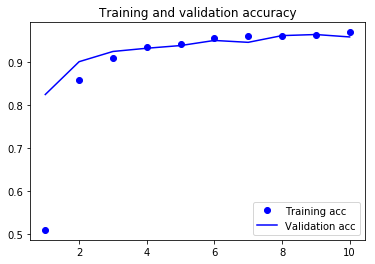

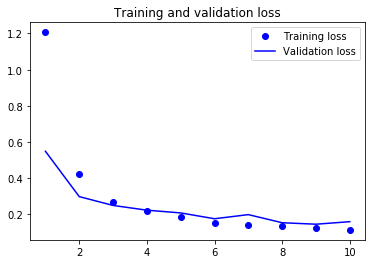

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [29]:
model.save('build_1.h5')

### Artificially increase our data

In [30]:
datagen = ImageDataGenerator(
            rescale=1./255,
            rotation_range=4,
            shear_range=0.05,
            height_shift_range=0.05,
            zoom_range=[.95, 1.05],
            brightness_range=(0.5, 1.5),
            data_format='channels_last',
            channel_shift_range=0.05,
            fill_mode='nearest')

train_generator = datagen.flow_from_directory(
                  TRAIN_DIR,
                  target_size=(64, 256),
                  batch_size=32,
                  class_mode='categorical')

Found 16682 images belonging to 6 classes.


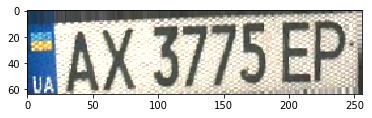

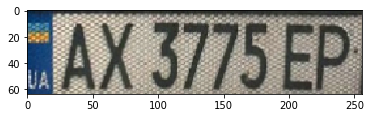

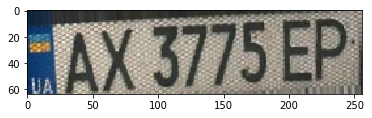

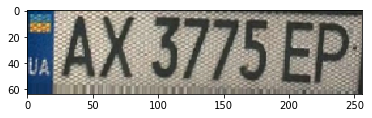

In [31]:
img_path = os.path.join(TRAIN_DIR, "1", "258534811.png")
img = image.load_img(img_path, target_size=(64, 256))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Lets train again!

In [32]:
model = build_1()
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)
loss, acc = model.evaluate_generator(test_generator, steps=100)
print(f"test loss: {loss}\ntest acc: {acc}")

Epoch 1/10
100/100 [==============================] - 29s 294ms/step - loss: 1.2774 - acc: 0.4928 - val_loss: 0.7747 - val_acc: 0.7050
Epoch 2/10
100/100 [==============================] - 29s 288ms/step - loss: 0.4937 - acc: 0.8372 - val_loss: 0.3647 - val_acc: 0.8881
Epoch 3/10
100/100 [==============================] - 29s 292ms/step - loss: 0.3617 - acc: 0.8851 - val_loss: 0.3191 - val_acc: 0.8850
Epoch 4/10
100/100 [==============================] - 29s 286ms/step - loss: 0.2708 - acc: 0.9094 - val_loss: 0.2408 - val_acc: 0.9206
Epoch 5/10
100/100 [==============================] - 29s 287ms/step - loss: 0.2598 - acc: 0.9156 - val_loss: 0.2173 - val_acc: 0.9356
Epoch 6/10
100/100 [==============================] - 29s 287ms/step - loss: 0.2171 - acc: 0.9334 - val_loss: 0.1843 - val_acc: 0.9481
Epoch 7/10
100/100 [==============================] - 29s 286ms/step - loss: 0.2054 - acc: 0.9372 - val_loss: 0.1595 - val_acc: 0.9544
Epoch 8/10
100/100 [==============================] - 2

### Now add dropout layer
<img src="https://cdn-images-1.medium.com/max/800/1*iWQzxhVlvadk6VAJjsgXgg.png"></img>

In [33]:
def build_2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 256, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten())
    
    # add here
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    
    return model

### And again!

In [51]:
model = build_2()
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_generator,
    validation_steps=50)
loss, acc = model.evaluate_generator(test_generator, steps=100)
print(f"test loss: {loss}\ntest acc: {acc}")

Epoch 1/30
100/100 [==============================] - 31s 306ms/step - loss: 1.3572 - acc: 0.4191 - val_loss: 0.7765 - val_acc: 0.7069
Epoch 2/30
100/100 [==============================] - 29s 290ms/step - loss: 0.6246 - acc: 0.7837 - val_loss: 0.4259 - val_acc: 0.8650
Epoch 3/30
100/100 [==============================] - 29s 285ms/step - loss: 0.4463 - acc: 0.8471 - val_loss: 0.2909 - val_acc: 0.8988
Epoch 4/30
100/100 [==============================] - 29s 289ms/step - loss: 0.3800 - acc: 0.8719 - val_loss: 0.2670 - val_acc: 0.9150
Epoch 5/30
100/100 [==============================] - 31s 306ms/step - loss: 0.2819 - acc: 0.9075 - val_loss: 0.2212 - val_acc: 0.9325
Epoch 6/30
100/100 [==============================] - 29s 294ms/step - loss: 0.2639 - acc: 0.9116 - val_loss: 0.2022 - val_acc: 0.9419
Epoch 7/30
100/100 [==============================] - 29s 290ms/step - loss: 0.2366 - acc: 0.9182 - val_loss: 0.1707 - val_acc: 0.9519
Epoch 8/30
100/100 [==============================] - 2

In [52]:
model.save("build_2.h5")

### Using a pre-trained convolutional neural network

In [36]:
conv_base = VGG16(weights='imagenet',
    include_top=False,
    input_shape=(64, 256, 3))

conv_base.trainable = False
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 256, 3)]      0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 256, 64)       1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 256, 64)       36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 128, 64)       0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 128, 128)      73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 128, 128)      147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 64, 128)       0     

In [37]:
def build_3():
    model = models.Sequential()
    model.add(conv_base)
    
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))
    return model

In [38]:
model = build_3()
model.compile(loss='categorical_crossentropy',
              optimizer='adamax',
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50)
loss, acc = model.evaluate_generator(test_generator, steps=100)
print(f"test loss: {loss}\ntest acc: {acc}")

Epoch 1/10
100/100 [==============================] - 188s 2s/step - loss: 0.6899 - acc: 0.7901 - val_loss: 0.3688 - val_acc: 0.9025
Epoch 2/10
100/100 [==============================] - 189s 2s/step - loss: 0.2706 - acc: 0.9281 - val_loss: 0.2405 - val_acc: 0.9444
Epoch 3/10
100/100 [==============================] - 188s 2s/step - loss: 0.2049 - acc: 0.9484 - val_loss: 0.2110 - val_acc: 0.9444
Epoch 4/10
100/100 [==============================] - 189s 2s/step - loss: 0.1950 - acc: 0.9497 - val_loss: 0.2003 - val_acc: 0.9469
Epoch 5/10
100/100 [==============================] - 189s 2s/step - loss: 0.1637 - acc: 0.9566 - val_loss: 0.2040 - val_acc: 0.9400
Epoch 6/10
100/100 [==============================] - 188s 2s/step - loss: 0.1326 - acc: 0.9659 - val_loss: 0.1609 - val_acc: 0.9669
Epoch 7/10
100/100 [==============================] - 188s 2s/step - loss: 0.1146 - acc: 0.9695 - val_loss: 0.1636 - val_acc: 0.9575
Epoch 8/10
100/100 [==============================] - 188s 2s/step - 

In [39]:
model.save("build_3.h5")

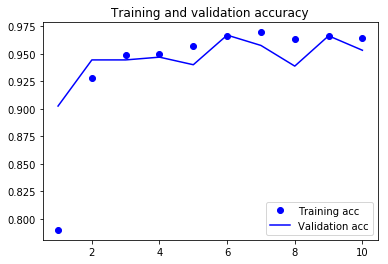

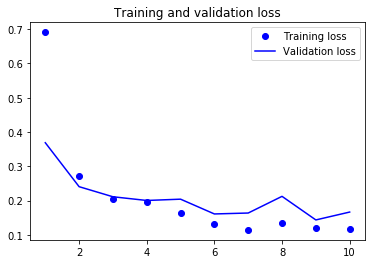

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Visualization

(1, 64, 256, 3)


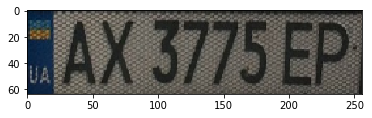

In [42]:
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

(1, 62, 254, 32)


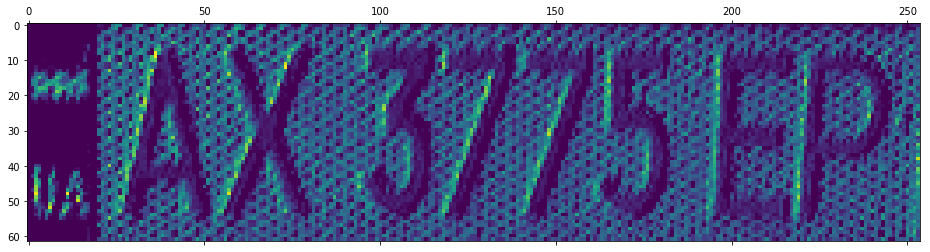

In [49]:
model = load_model('build_1.h5')

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]

print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

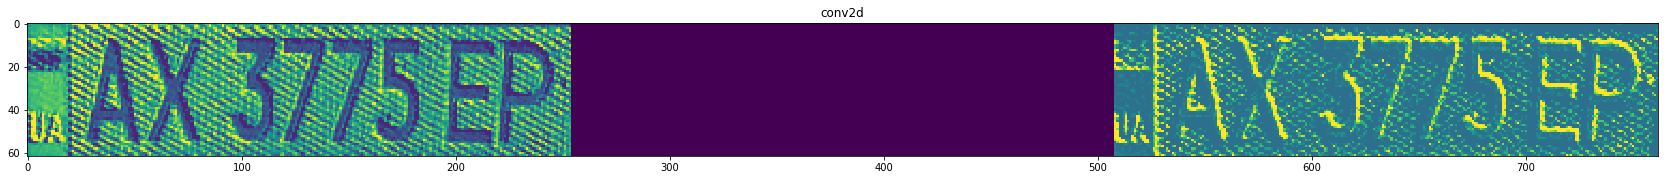

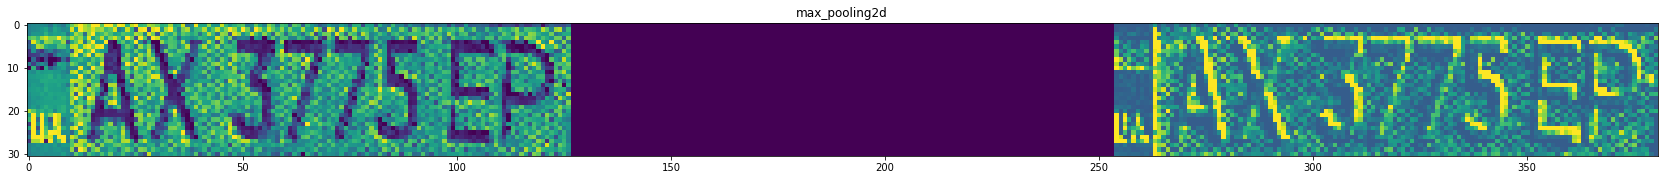

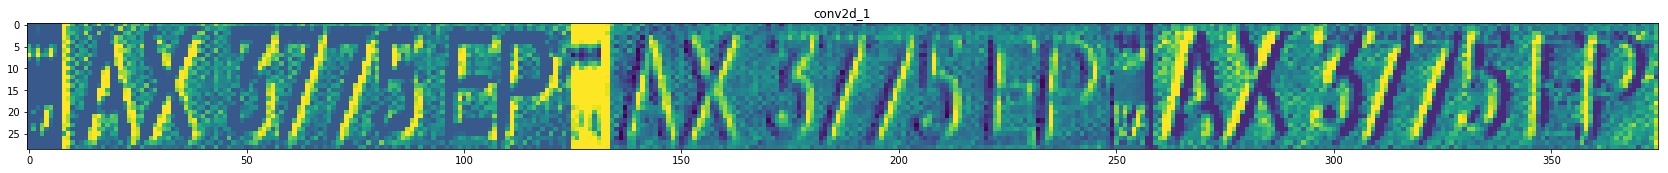

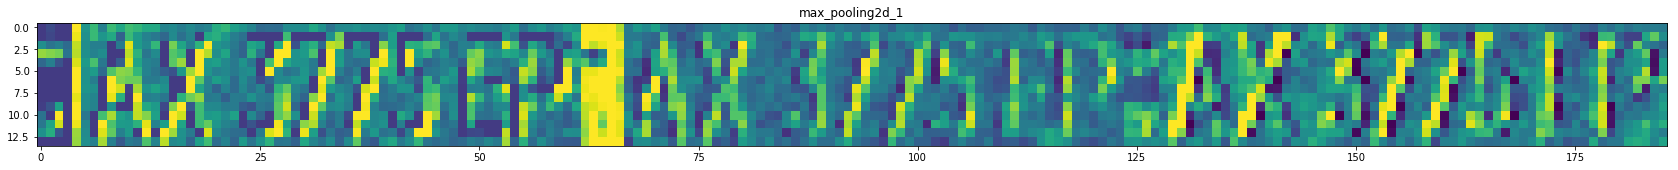

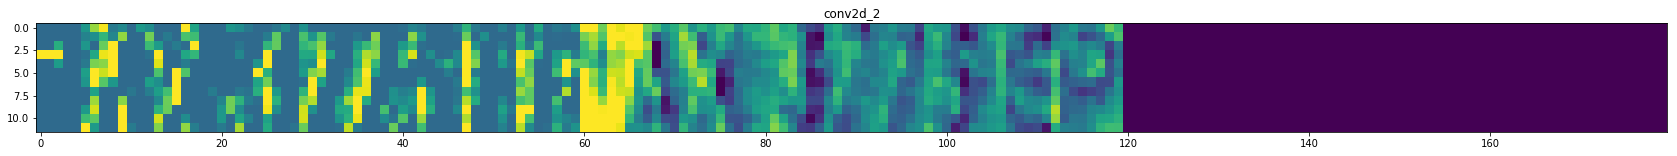

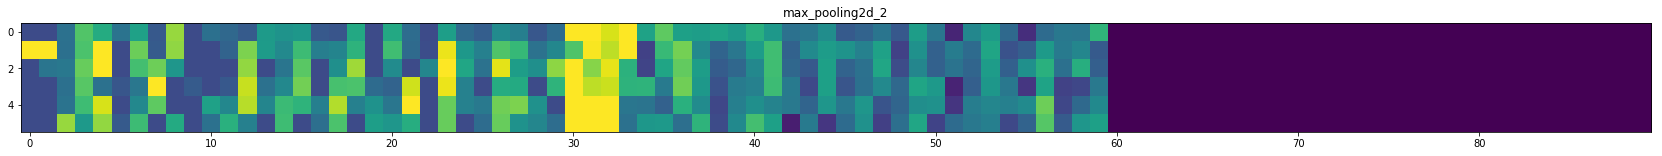

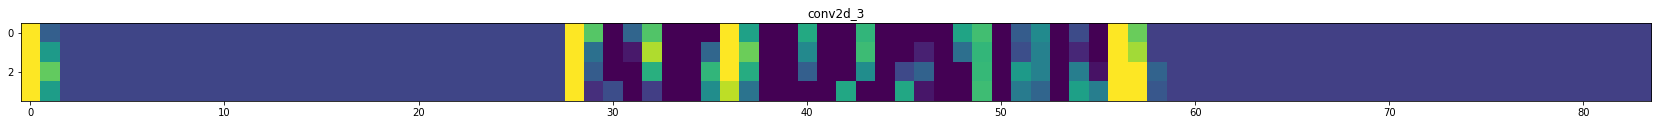

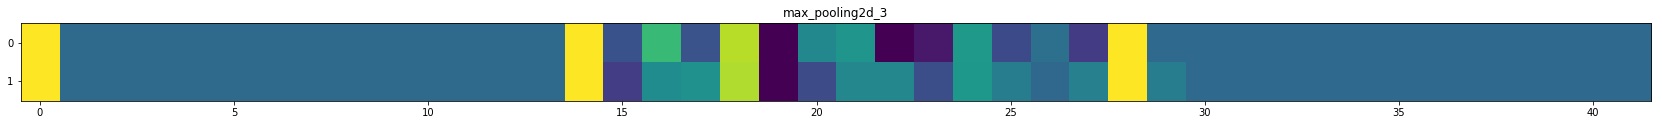

In [50]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

i = 0
images_per_row = 3
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[0]
    
    size_w = layer_activation.shape[1]
    size_h = layer_activation.shape[2]
    n_cols = n_features
    display_grid = np.zeros((size_w * n_cols, images_per_row * size_h))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size_w : (col + 1) * size_w,
                         row * size_h : (row + 1) * size_h] = channel_image
            i += 1
    scale = 10. / size_h
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.imshow(display_grid)